In [1]:
import numpy as np
import scipy.io
import scipy
from scipy import stats
import math
import matplotlib.pyplot as plt
import pandas as pd
from ipynb.fs.full.utils import *

In [2]:
shot_scale_csv = pd.read_csv('E:/FPP_files_and_codes/FPP_files/shot_scale_labels/corrected_shot_scale_predictions.csv')

In [3]:
shot_scale_labels = np.array(shot_scale_csv['human_pred'])

In [4]:
set(shot_scale_labels)

{'CS', 'LS', 'MS', 'Unclear'}

In [5]:
shot_scale_labels.shape

(3655,)

In [6]:
CS_seconds = np.where(shot_scale_labels == 'CS')[0]
LS_seconds = np.where(shot_scale_labels == 'LS')[0]
MS_seconds = np.where(shot_scale_labels == 'MS')[0]

In [7]:
print(CS_seconds.shape)
print(MS_seconds.shape)
print(LS_seconds.shape)

(1856,)
(833,)
(463,)


In [8]:
delay = 5
shifted_CS_seconds = (CS_seconds + delay)%3655
shifted_MS_seconds = (MS_seconds + delay)%3655
shifted_LS_seconds = (LS_seconds + delay)%3655

In [9]:
mean_FPPs_activity = mean_FPPs_movie_data()

In [10]:
mean_FPPs_activity.shape

(5, 3655)

In [11]:
mean_activity_each_FPP_in_different_shot_scales = np.zeros((5,3))
SEM_mean_activity_each_FPP_in_different_shot_scales = np.zeros((5,3))

for i in range(5):
    # Calculate mean and standard deviation activity for each FPP
    FPP_activity = mean_FPPs_activity[i]

    FPP_CS = FPP_activity[shifted_CS_seconds]

    FPP_MS = FPP_activity[shifted_MS_seconds]

    FPP_LS = FPP_activity[shifted_LS_seconds]

    means = [np.mean(FPP_CS), np.mean(FPP_MS), np.mean(FPP_LS)]
    mean_activity_each_FPP_in_different_shot_scales[i] = means

    SEMs = [stats.sem(FPP_CS), stats.sem(FPP_MS), stats.sem(FPP_LS)]
    SEM_mean_activity_each_FPP_in_different_shot_scales[i] = SEMs



In [12]:
FPP_CS.shape

(1856,)

In [13]:
mean_activity_each_FPP_in_different_shot_scales.T

array([[-0.0624447 ,  0.00612737,  0.01183942, -0.0014392 , -0.00584363],
       [ 0.04243427,  0.06767031,  0.06137804,  0.062759  ,  0.06519675],
       [ 0.16291888,  0.06767903,  0.08840476,  0.10389913,  0.1113595 ]])

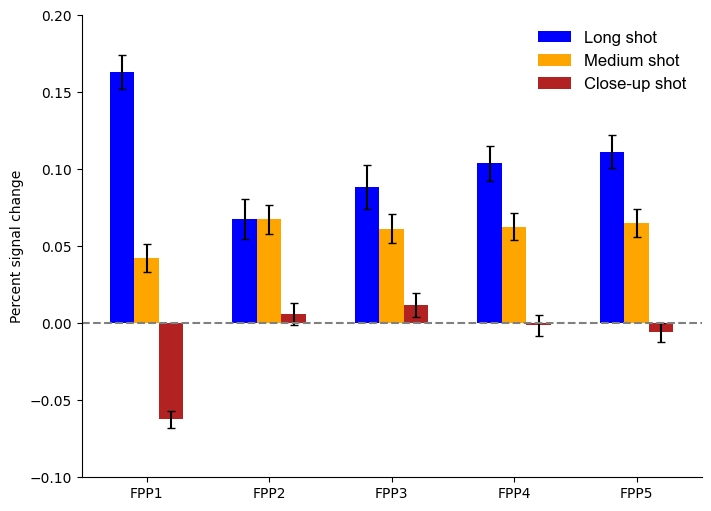

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x_labels = ['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5']
bar_width = 0.2

index = np.arange(len(x_labels))

fig, ax = plt.subplots(figsize=(8, 6))

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

bar1 = ax.bar(index - bar_width, mean_activity_each_FPP_in_different_shot_scales.T[2], bar_width,  yerr=SEM_mean_activity_each_FPP_in_different_shot_scales.T[2], label='Long shot', capsize=3, color='blue')

bar2 = ax.bar(index, mean_activity_each_FPP_in_different_shot_scales.T[1], bar_width,  yerr=SEM_mean_activity_each_FPP_in_different_shot_scales.T[1], label='Medium shot', capsize=3, color='orange')


bar3 = ax.bar(index + bar_width, mean_activity_each_FPP_in_different_shot_scales.T[0], bar_width, yerr=SEM_mean_activity_each_FPP_in_different_shot_scales.T[0], label='Close-up shot', capsize=3, color='firebrick')

ax.axhline(0, color='gray', linestyle='--')

ax.set_ylim(-0.1,0.2)
ax.set_ylabel('Percent signal change')
ax.set_xticks(index)
ax.set_xticklabels(x_labels)
plt.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('E:/FPP_files_and_codes/Figures/Figure4_files/Row3/shot_scale_barplot.png', dpi=600, bbox_inches='tight')
plt.show()


In [15]:
dic_shot_scales = {
    "FPP" : [],
    "shot_scale" : [],
    "activity" : []
}
for i in range(5):
    
    FPP_activity = mean_FPPs_activity[i]

    FPP_CS = FPP_activity[shifted_CS_seconds]

    CS_list = ["CS" for _ in range(shifted_CS_seconds.shape[0])]
    dic_shot_scales["shot_scale"].extend(CS_list)
    dic_shot_scales["activity"].extend(FPP_CS)

    FPP_MS = FPP_activity[shifted_MS_seconds]

    MS_list = ["MS" for _ in range(shifted_MS_seconds.shape[0])]
    dic_shot_scales["shot_scale"].extend(MS_list)
    dic_shot_scales["activity"].extend(FPP_MS)

    FPP_LS = FPP_activity[shifted_LS_seconds]

    LS_list = ["LS" for _ in range(shifted_LS_seconds.shape[0])]
    dic_shot_scales["shot_scale"].extend(LS_list)
    dic_shot_scales["activity"].extend(FPP_LS)

    sum_seconds = shifted_CS_seconds.shape[0] + shifted_MS_seconds.shape[0] + shifted_LS_seconds.shape[0]
    FPP_list = [f'{i+1}'] * sum_seconds
    dic_shot_scales["FPP"].extend(FPP_list)

In [16]:
shoe_scale_dataframe = pd.DataFrame(dic_shot_scales)

In [18]:
shoe_scale_dataframe

,FPP,shot_scale,activity
0,1,CS,0.131044
1,1,CS,0.117006
2,1,CS,0.115433
3,1,CS,0.049863
4,1,CS,0.006824
...,...,...,...
15755,5,LS,-0.080641
15756,5,LS,0.001246
15757,5,LS,-0.062085
15758,5,LS,-0.141530


In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [20]:
model = ols('activity ~ C(shot_scale) + C(FPP) + C(shot_scale):C(FPP)', data=shoe_scale_dataframe).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Tukey's HSD for multiple comparisons
tukey = mc.pairwise_tukeyhsd(endog=shoe_scale_dataframe['activity'], groups=shoe_scale_dataframe['shot_scale'] + shoe_scale_dataframe['FPP'], alpha=0.05)
print("\nTukey's HSD Results:")
print(tukey)


ANOVA Table:
                           sum_sq       df           F        PR(>F)
C(shot_scale)           32.174482      2.0  207.542494  1.079122e-89
C(FPP)                   2.952603      4.0    9.522930  1.095230e-07
C(shot_scale):C(FPP)     6.360454      8.0   10.257076  2.063864e-14
Residual              1220.442152  15745.0         NaN           NaN

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   CS1    CS2   0.0686    0.0  0.0376  0.0996   True
   CS1    CS3   0.0743    0.0  0.0433  0.1053   True
   CS1    CS4    0.061    0.0    0.03   0.092   True
   CS1    CS5   0.0566    0.0  0.0256  0.0876   True
   CS1    LS1   0.2254    0.0  0.1763  0.2744   True
   CS1    LS2   0.1301    0.0  0.0811  0.1792   True
   CS1    LS3   0.1508    0.0  0.1018  0.1999   True
   CS1    LS4   0.1663    0.0  0.1173  0.2154   True
   CS1    LS5   0.1738    0.0  0.1247

c:\Users\roza\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\integrate\_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


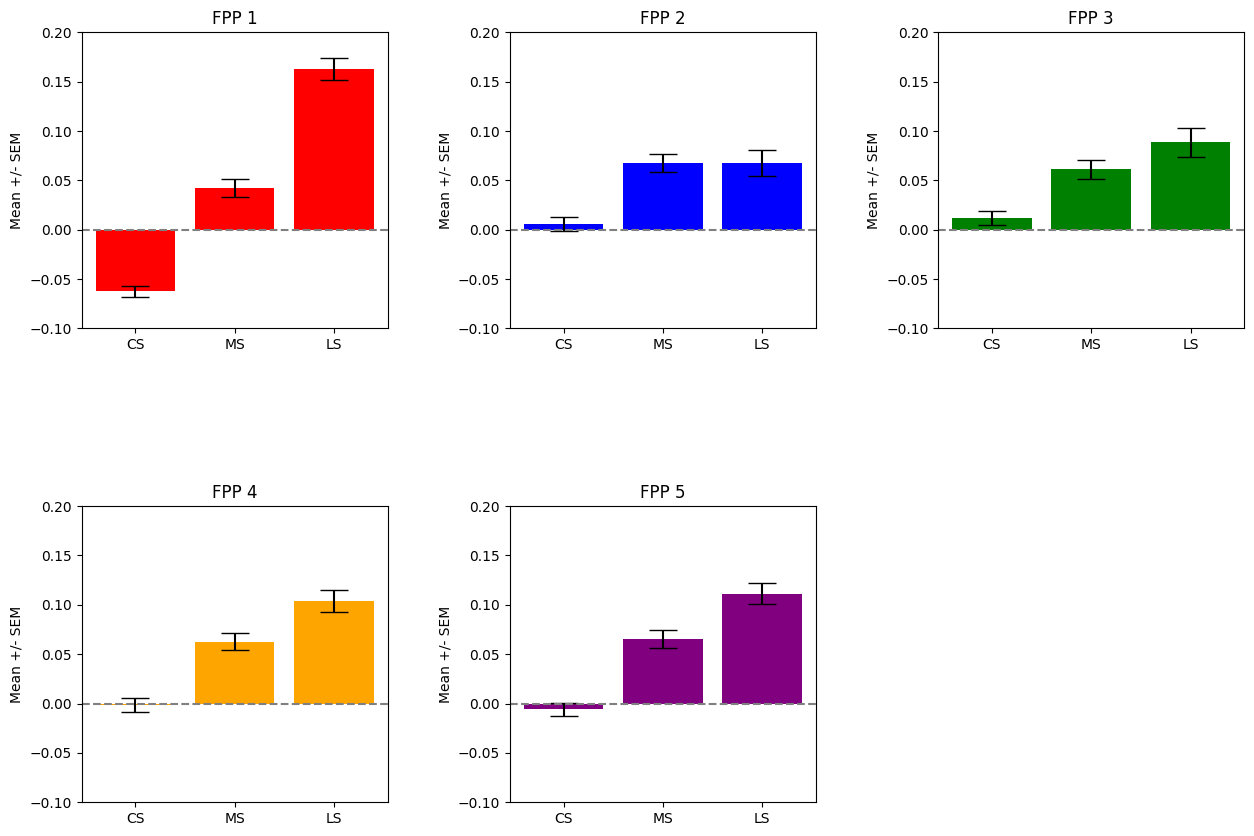

In [21]:
MeanActivityNonBlankFramesInEahcshot = np.zeros((5,3))

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, ax in enumerate(axs.flat):
    # Calculate mean and standard deviation
    FPP_activity = mean_FPPs_activity[i]

    FPP_CS = FPP_activity[shifted_CS_seconds]

    FPP_MS = FPP_activity[shifted_MS_seconds]

    FPP_LS = FPP_activity[shifted_LS_seconds]

    means = [np.mean(FPP_CS), np.mean(FPP_MS), np.mean(FPP_LS)]
    
    MeanActivityNonBlankFramesInEahcshot[i] = means

    SEMs = [stats.sem(FPP_CS), stats.sem(FPP_MS), stats.sem(FPP_LS)]

    labels = ['CS', 'MS', 'LS']

    # Plot bar with error bars
    ax.bar(labels, means, yerr=SEMs, color=colors[i], capsize=10)
#     ax.bar(0, mean, yerr=std, color=colors[i], capsize=10)
    ax.set_title(f'FPP {i+1}')
#     ax.set_xticks([])
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_ylim(-0.1,0.2)
    ax.set_ylabel('Mean +/- SEM')
    if i == 4:
        break
axs[1, 2].axis('off')
# Adjust layout
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()

In [22]:
mean_FPPs_activity

array([[ 0.18236606,  0.14638163,  0.12198991, ...,  0.0862237 ,
         0.11810479,  0.1205579 ],
       [-0.00054443, -0.1763386 , -0.03980189, ..., -0.42359205,
        -0.35804712, -0.29062543],
       [-0.04344583, -0.19558185, -0.02269511, ..., -0.49385949,
        -0.47951352, -0.40800163],
       [-0.12195691, -0.24757926, -0.14228903, ..., -0.43942906,
        -0.43359549, -0.40197286],
       [-0.30909105, -0.21977826, -0.06803193, ..., -0.36626227,
        -0.33330164, -0.24720643]])